<a href="https://colab.research.google.com/github/RajnishGautam/TechnoHacks-EDUTECH/blob/main/Task_1_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TECHNOHACKS EDUTECH INTERNSHIP**
TASK 1 : HOUSE PRICE PREDICTION


Author : Rajnish Kumar                                                                        
Aim : To create a model that use a dataset that includes information about
housing prices and features like square
footage, number of bedrooms, etc. to train a
model that can predict the price of a new
house


In [ ]:
#IMPORTING THE DEPENDENCIES
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [ ]:
#importing csv file
house_df_main=pd.read_csv('/content/kc_house_data.csv')
house_df = house_df_main.copy()

In [ ]:
house_df.head(10)


id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [ ]:
house_df.describe(include='all')

id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.114757   2079.899736  1.510697e+04      1.494309      0.007542   
std         0.770163    918.440897  4.142051e+04      0.539989      0.086517   
min         0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%         1.750000   1427.000000  5.040000e+03      1.000000      0.000000   
50%         2.250000   1910.000000  7.618000e+03      1.500000      0.000000   
75%         2.500000   2550.000000  1.068800e+04      2.000000      0.000000   
max         8.000000  13540.000000  1.651359e+06      3.500000      1.000000   

                view  ...         grade    sqft_above  sqft_basement  \
count   21613.000000  ...  21613.000000  21613.000000   21613.000000   
unique           NaN  ...           NaN           NaN            NaN   
top              NaN  ...           NaN           NaN            NaN   
freq             NaN  ...           NaN           NaN            NaN   
mean        0.234303  ...      7.656873   1788.390691     291.509045   
std         0.766318  ...      1.175459    828.090978     442.575043   
min         0.000000  ...      1.000000    290.000000       0.000000   
25%         0.000000  ...      7.000000   1190.000000       0.000000   
50%         0.000000  ...      7.000000   1560.000000       0.000000   
75%         0.000000  ...      8.000000   2210.000000     560.000000   
max         4.000000  ...     13.000000   9410.000000    4820.000000   

            yr_built  yr_renovated       zipcode           lat          long  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     1971.005136     84.402258  98077.939805     47.560053   -122.213896   
std        29.373411    401.679240     53.505026      0.138564      0.140828   
min      1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%      1951.000000      0.000000  98033.000000     47.471000   -122.328000   
50%      1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%      1997.000000      0.000000  98118.000000     47.678000   -122.125000   
max      2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

        sqft_living15     sqft_lot15  
count    21613.000000   21613.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      1986.552492   12768.455652  
std        685.391304   27304.179631  
min        399.000000     651.000000  
25%       1490.000000    5100.000000  
50%       1840.000000    7620.000000  
75%       23

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
import pandas as pd

data = house_df.copy()

threshold = 0.8
data = data[data.columns[data.isnull().mean() < threshold]]

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Fill missing values for numerical columns only
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [ ]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

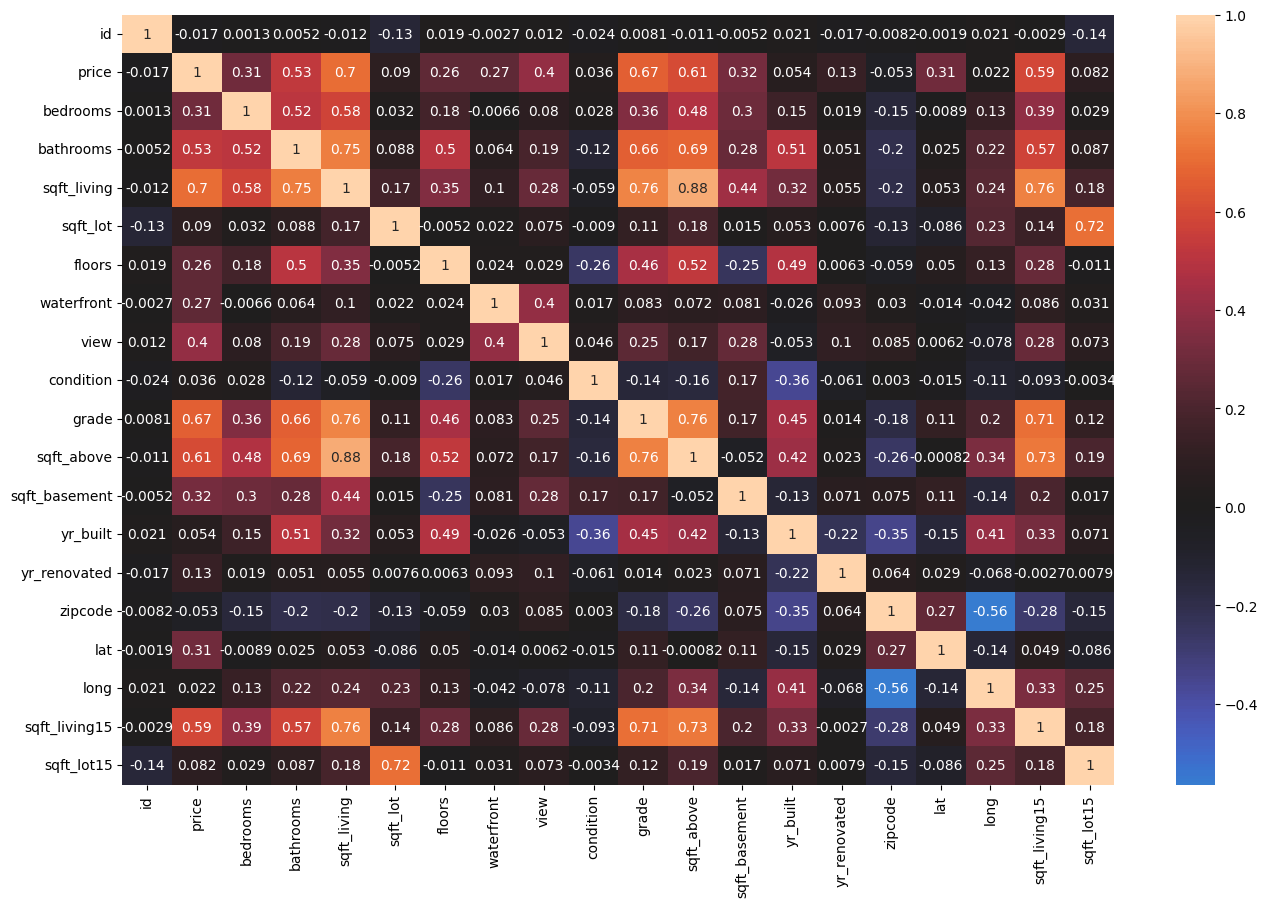

In [ ]:
# Select only numerical columns for correlation calculation
numerical_data = house_df.select_dtypes(include=['number'])

# Calculate correlations for numerical columns
plt.figure(figsize=(16, 10))
sns.heatmap(numerical_data.corr(), annot=True, center=0)
plt.show()

In [ ]:
dic = {}

In [ ]:
wmhouse_df = house_df.copy()
wmhouse_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names_to_normalize = ['bedrooms', 'bathrooms', 'sqft_living',
         'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
x = wmhouse_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)

# Create a DataFrame with the scaled values
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index=wmhouse_df.index)


In [ ]:
#worst model
wm_data =wmhouse_df.copy()
wmY = wm_data['price']
wm_data.drop(columns=['bedrooms','price'],inplace=True)

# Split the data into training and testing sets
wmX_train, wmX_test, wmy_train, wmy_test = train_test_split(wm_data, wmY, test_size=0.2, random_state=1)

wm_data.columns


Index(['id', 'date', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

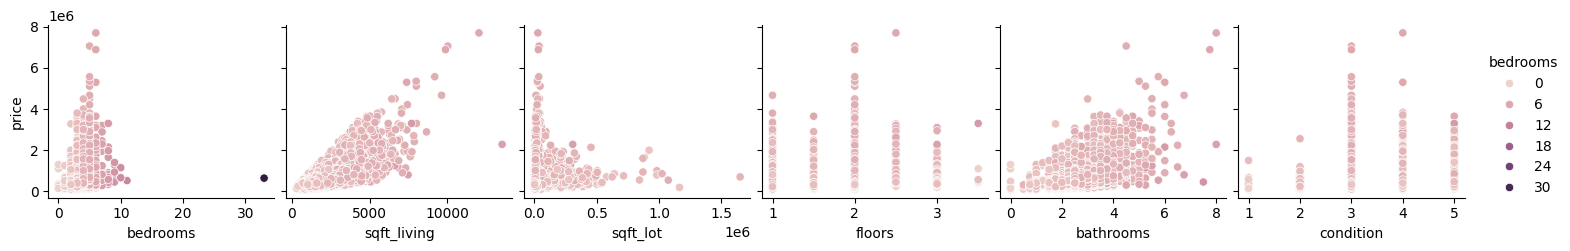

In [ ]:
sns.pairplot(house_df, x_vars=['bedrooms','sqft_living', 'sqft_lot', 'floors', 'bathrooms', 'condition'],y_vars ='price',hue = 'bedrooms')

In [ ]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
house_df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [ ]:
house_df['sqft_living'].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

<Axes: xlabel='bedrooms'>

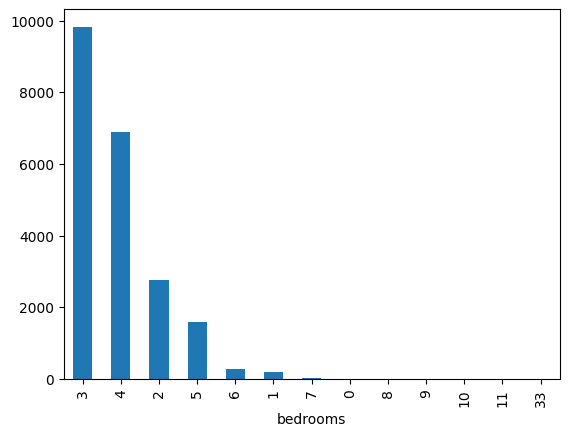

In [ ]:
house_df['bedrooms'].value_counts().plot(kind='bar')

<Axes: xlabel='bathrooms'>

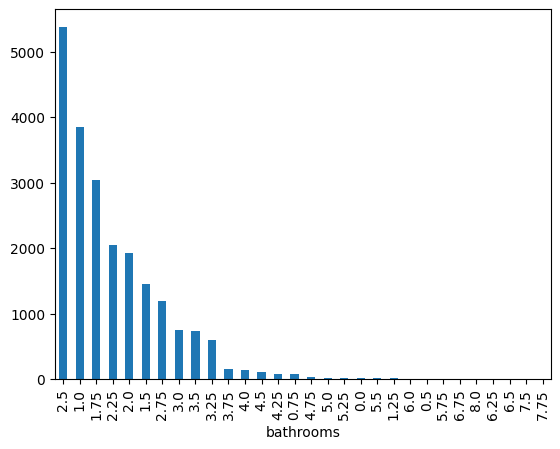

In [ ]:
house_df['bathrooms'].value_counts().plot(kind='bar')

<Axes: xlabel='sqft_living', ylabel='price'>

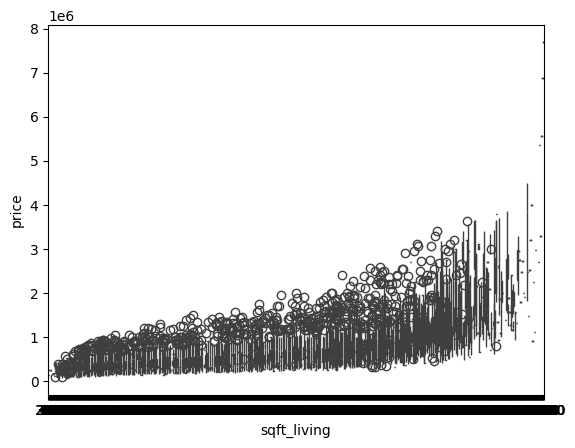

In [ ]:
sns.boxplot(x="sqft_living", y="price", data=house_df)


<Axes: xlabel='bedrooms', ylabel='price'>

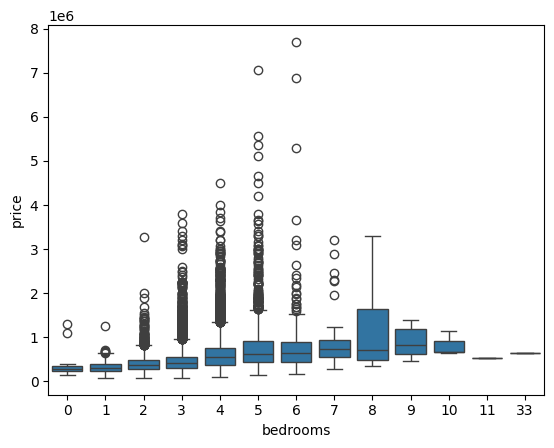

In [ ]:
sns.boxplot(x="bedrooms",y= "price", data=house_df)

<Axes: xlabel='yr_built', ylabel='price'>

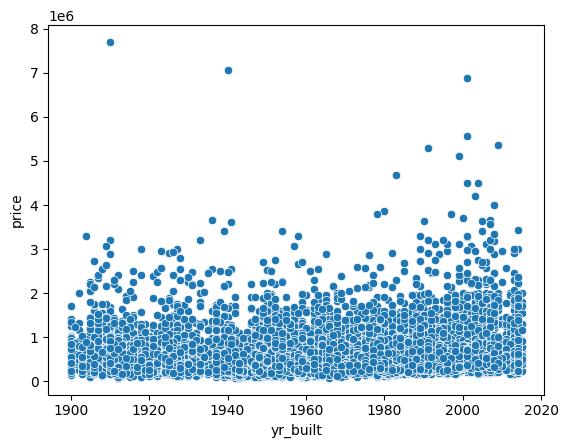

In [ ]:
sns.scatterplot(x="yr_built", y="price", data=house_df)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

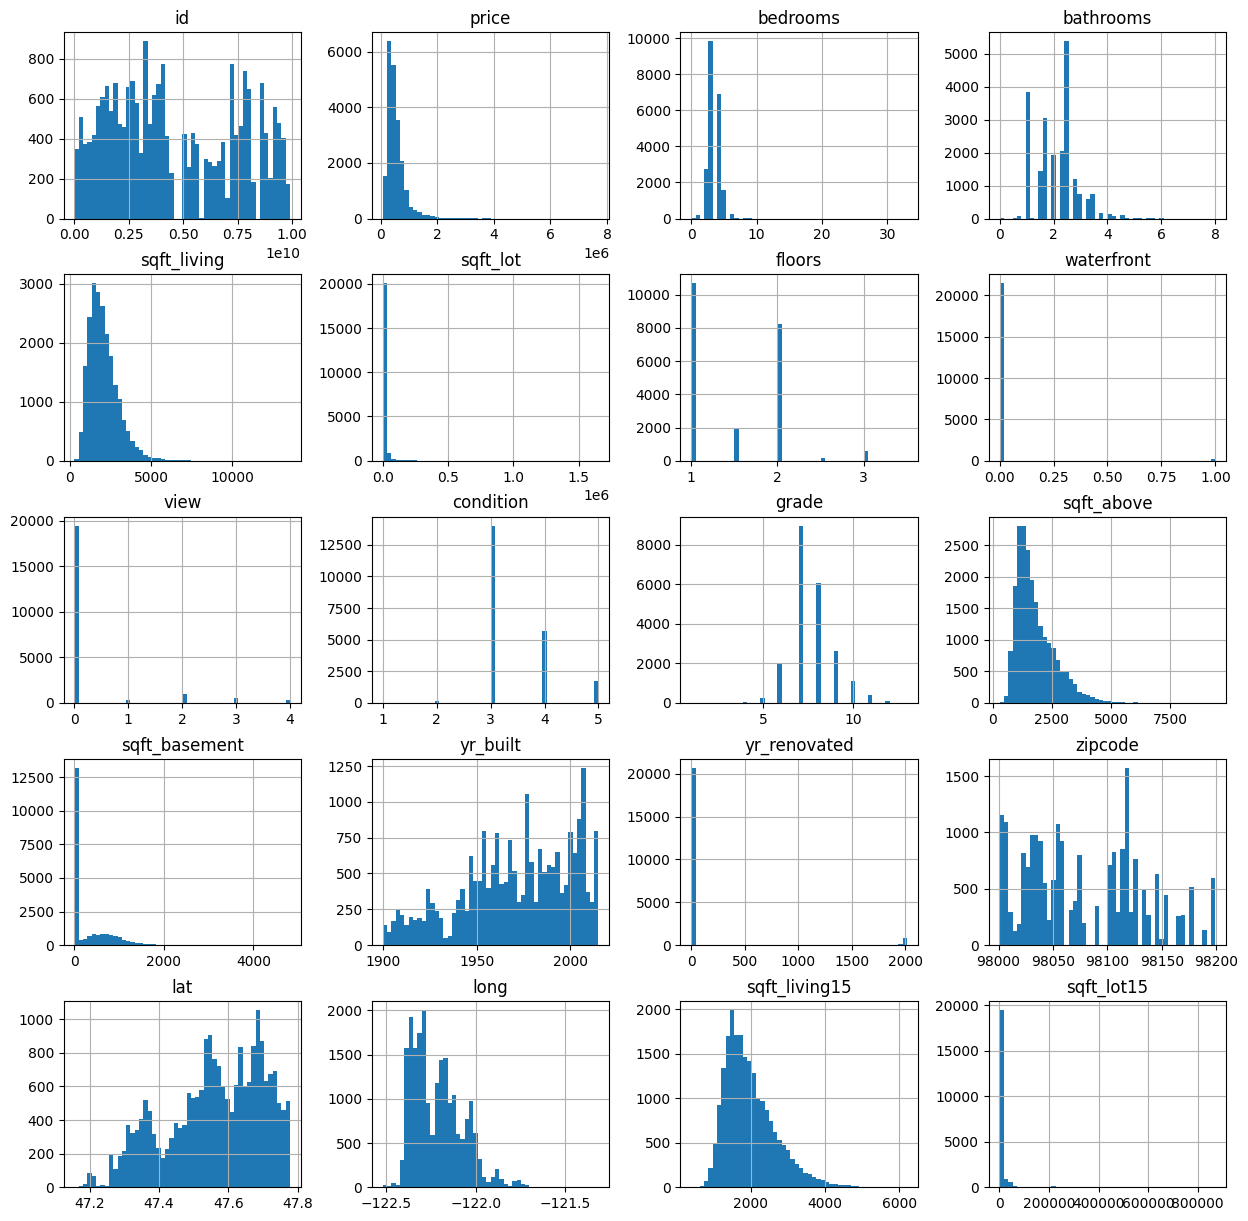

In [ ]:
house_df.hist(bins=50, figsize=(15, 15))

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

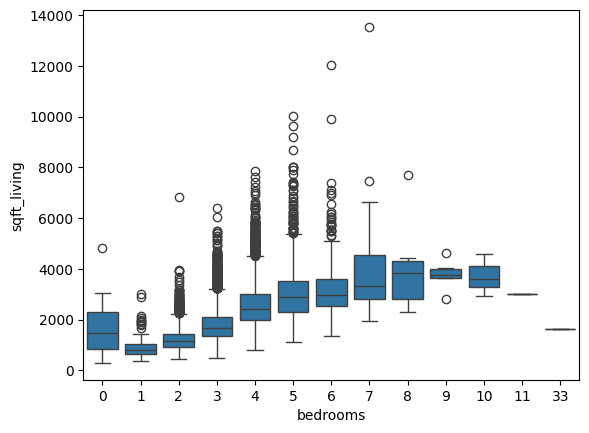

In [ ]:
sns.boxplot(x="bedrooms", y="sqft_living", data=house_df)

<ipython-input-41-b471b6c2a720>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['bedrooms'], kde = False, color ='red', bins = 30)


<Axes: xlabel='bedrooms'>

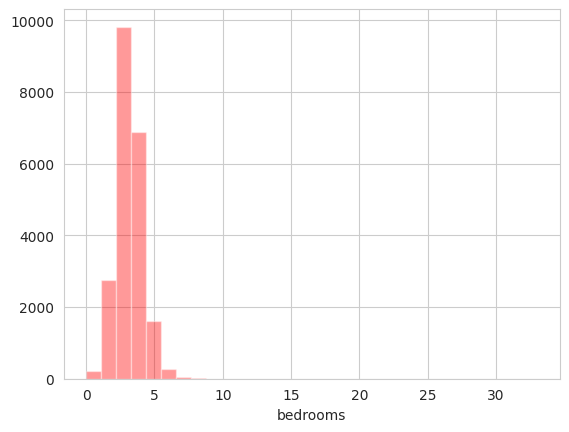

In [ ]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(house_df['bedrooms'], kde = False, color ='red', bins = 30)


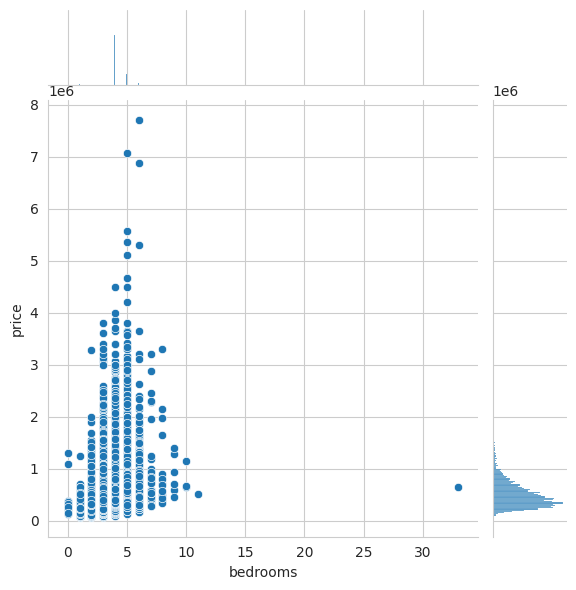

In [ ]:
sns.jointplot(x ='bedrooms', y ='price', data = house_df)


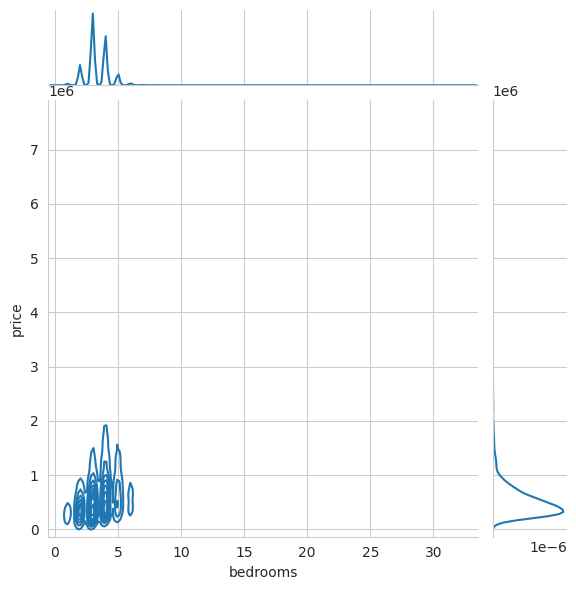

In [ ]:
sns.jointplot(x ='bedrooms', y ='price', data = house_df, kind ='kde')
# KDE shows the density where the points match up the most


<Axes: xlabel='bedrooms', ylabel='sqft_living'>

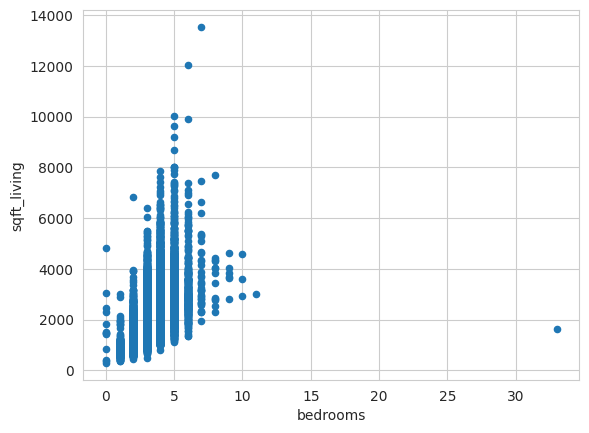

In [ ]:
house_df.plot.scatter(x='bedrooms', y='sqft_living')

<Axes: xlabel='price', ylabel='Count'>

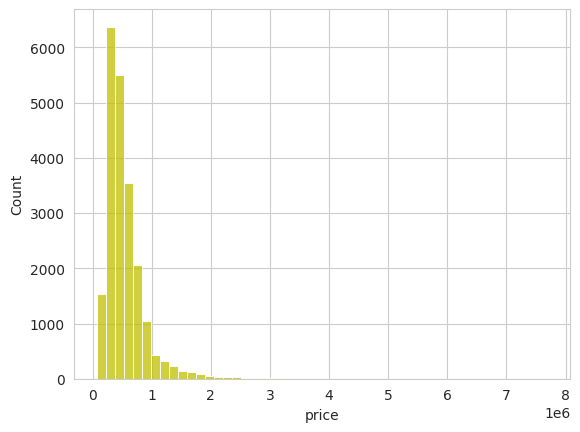

In [ ]:
In [1]: sns.histplot(house_df, x='price', bins=50, color='y')

<ipython-input-51-856919b68c02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(house_df, x='price', palette='Blues')


<Axes: xlabel='price'>

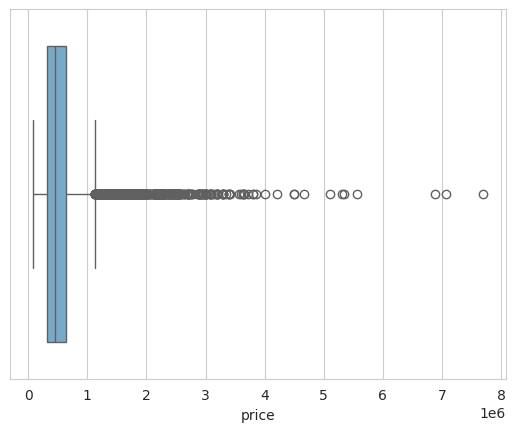

<ipython-input-52-856919b68c02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(house_df, x='price', palette='Blues')


<Axes: xlabel='price'>

In [ ]:
sns.boxplot(house_df, x='price', palette='Blues')



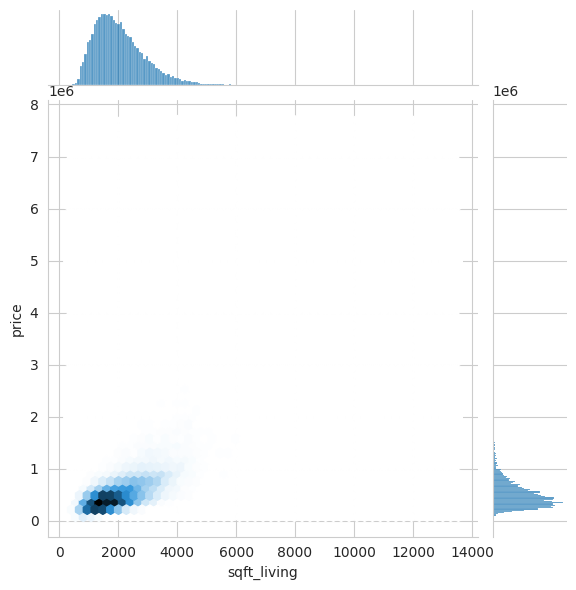

In [ ]:
sns.jointplot(house_df, x='sqft_living', y='price', kind='hex')

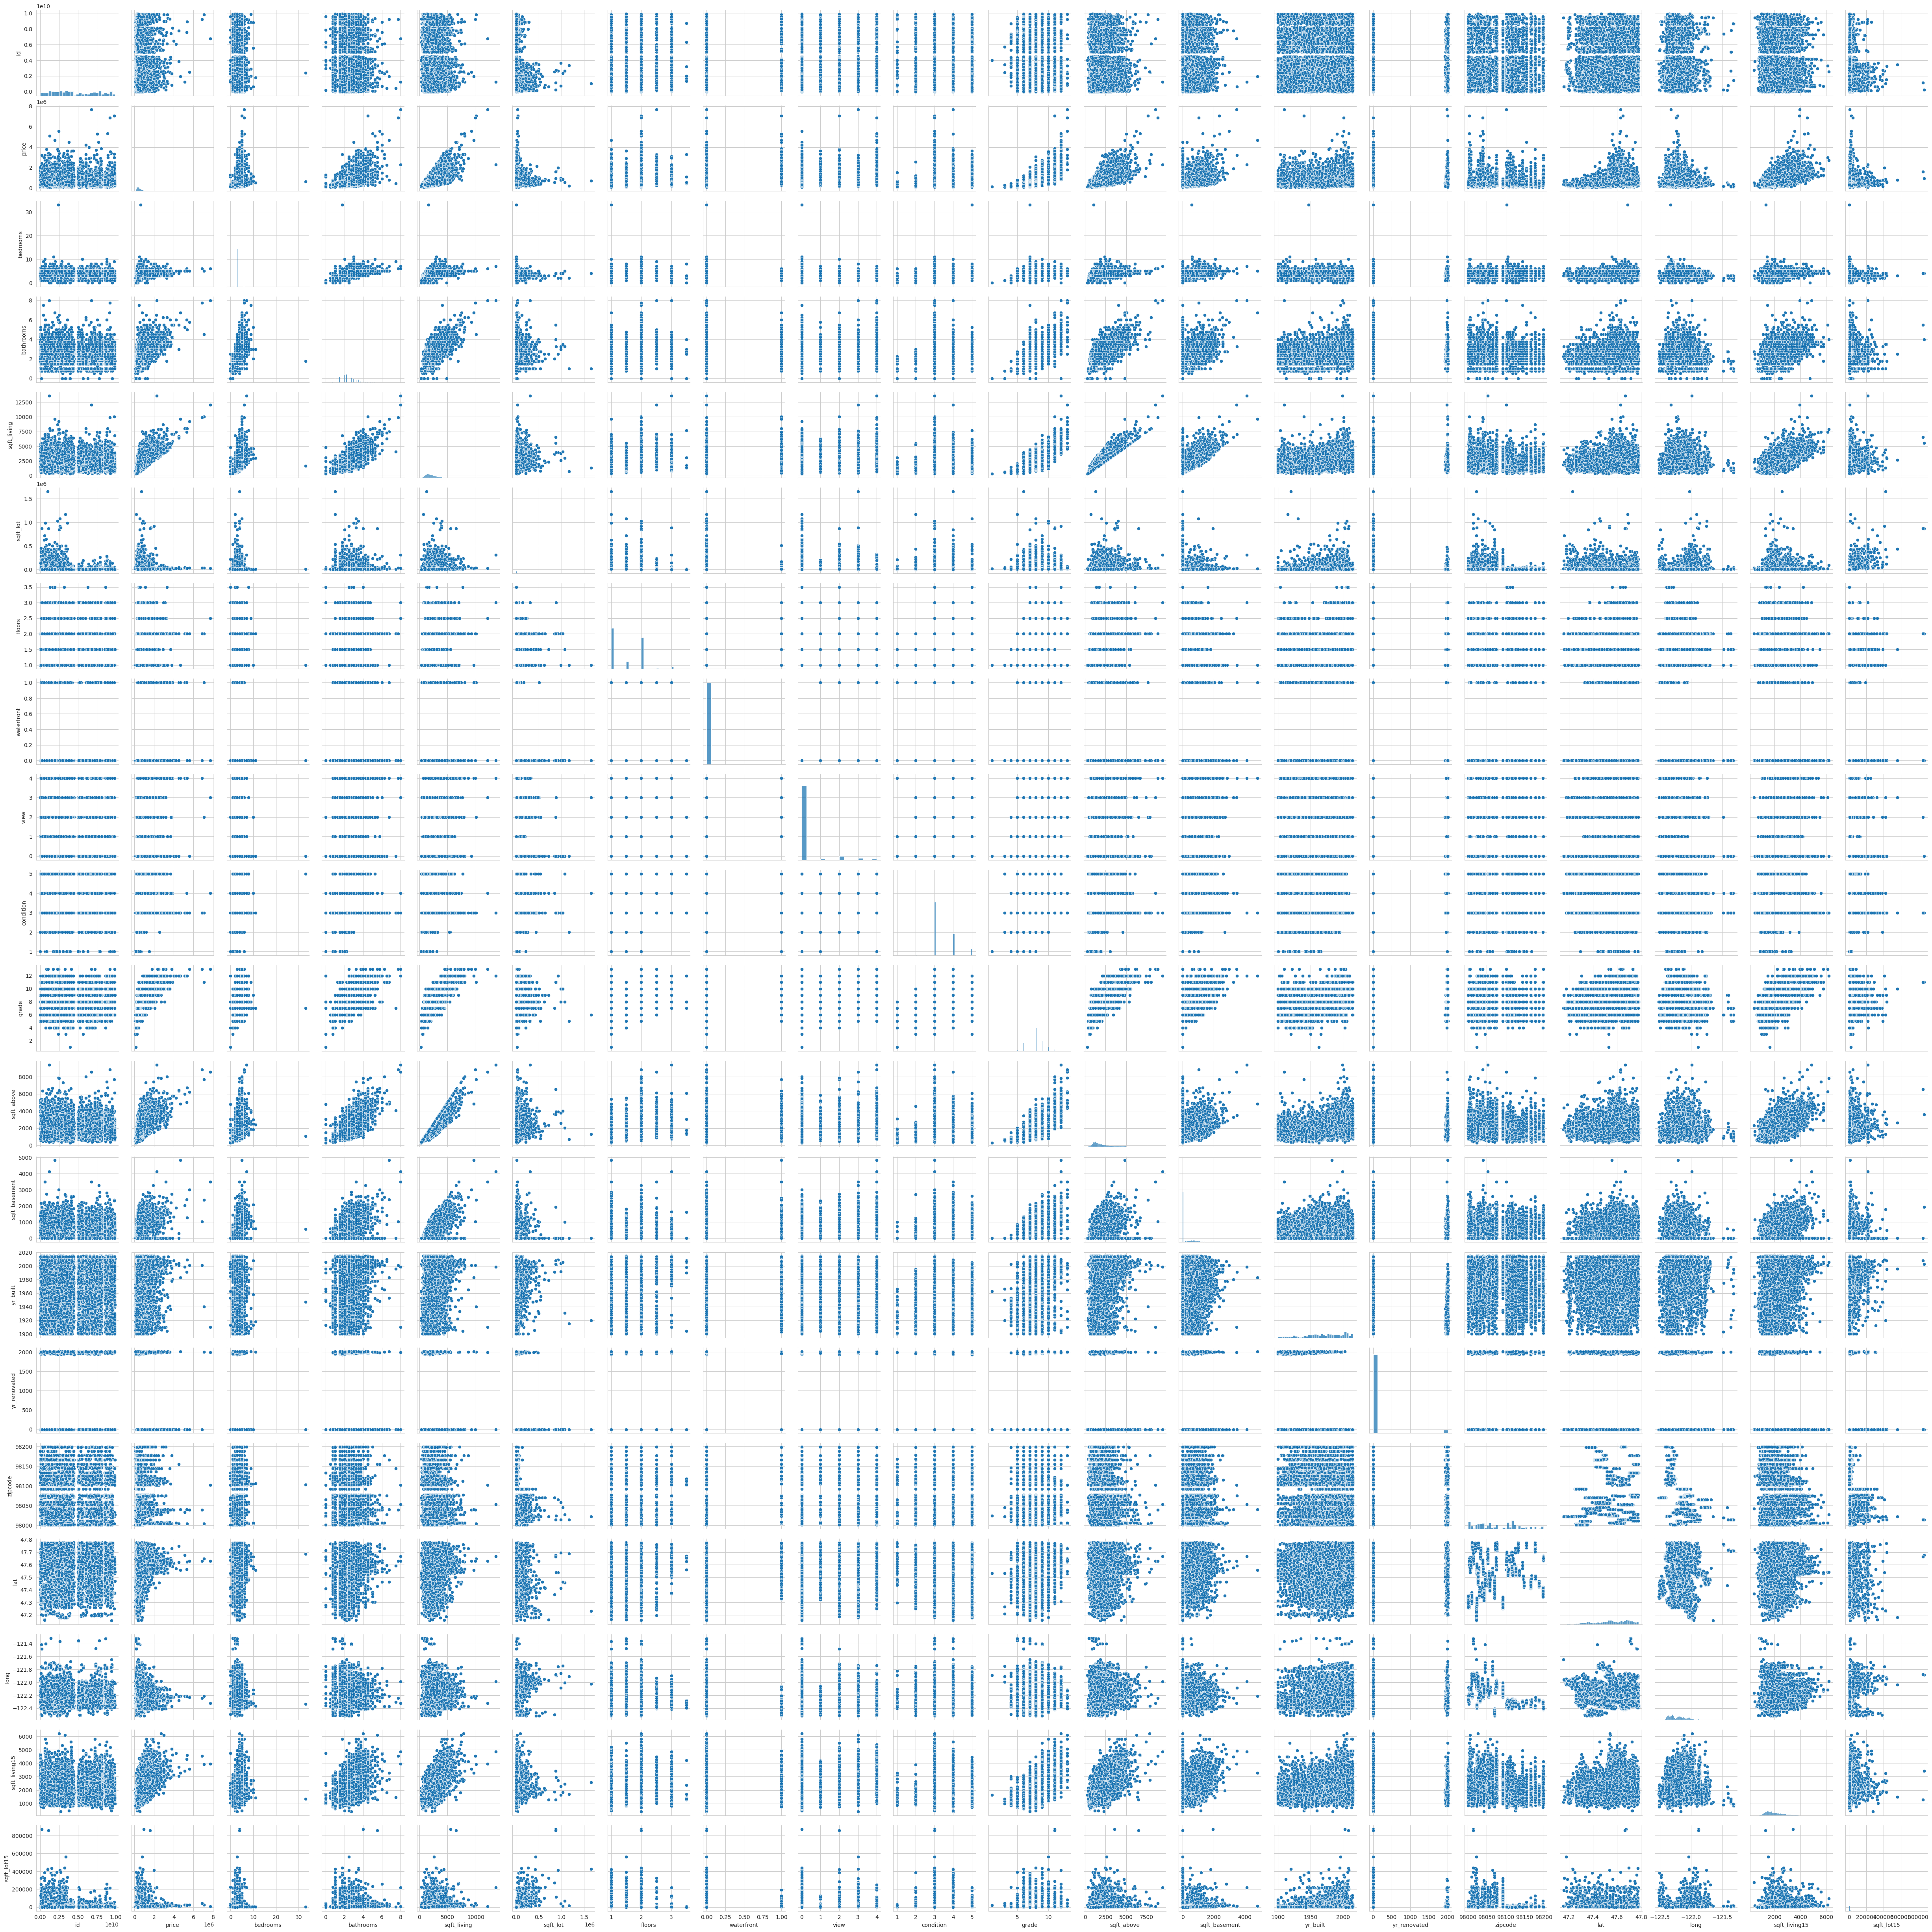

<Figure size 1200x800 with 0 Axes>

In [ ]:
sns.pairplot(house_df)
plt.figure(figsize=(12, 8))
plt.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

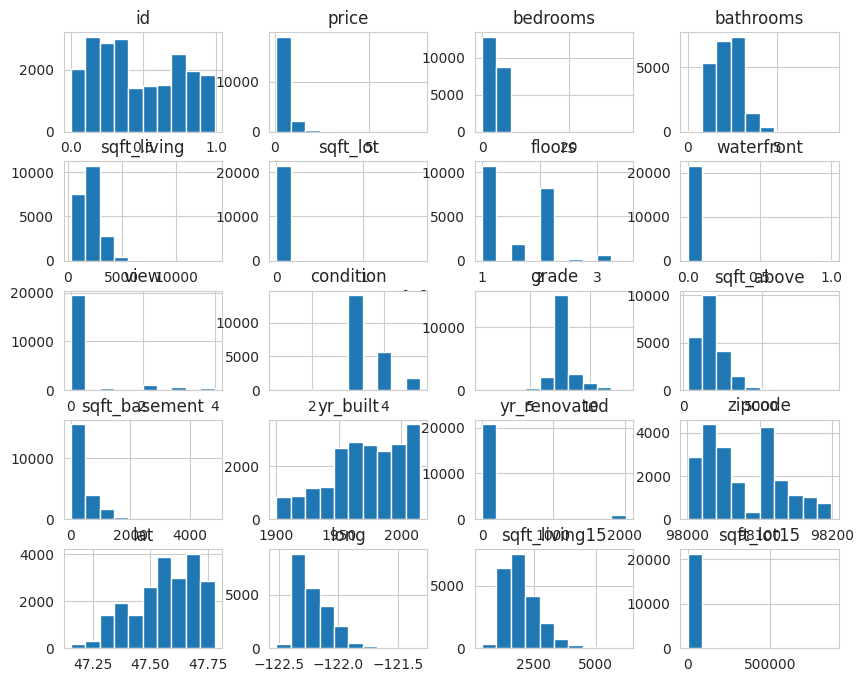

In [ ]:
house_df.hist(figsize=(10,8))



In [ ]:
house_df.corr(numeric_only=True)



id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

                                                  




                                                                   THANK YOU